<a href="https://colab.research.google.com/github/tawsif5001/brain_tumor_detection_app-using-cnn/blob/main/Alex_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn pillow


Found 1049 images belonging to 4 classes.
Found 262 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 316s 8s/step - accuracy: 0.3344 - loss: 2.0883 - val_accuracy: 0.2939 - val_loss: 1.3609
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 231s 7s/step - accuracy: 0.6073 - loss: 0.9439 - val_accuracy: 0.2290 - val_loss: 1.4394
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 234s 7s/step - accuracy: 0.6494 - loss: 0.8202 - val_accuracy: 0.2290 - val_loss: 1.6651
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 244s 7s/step - accuracy: 0.7029 - loss: 0.7459 - val_accuracy: 0.2939 - val_loss: 1.4010
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 252s 7s/step - accuracy: 0.7316 - loss: 0.6326 - val_accuracy: 0.2023 - val_loss: 1.6376
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 230s 7s/step - accuracy: 0.7332 - loss: 0.6230 - val_accuracy: 0.2901 - val_loss: 1.9084
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.3129 - loss: 1.3582
Validation Accuracy: 0.30


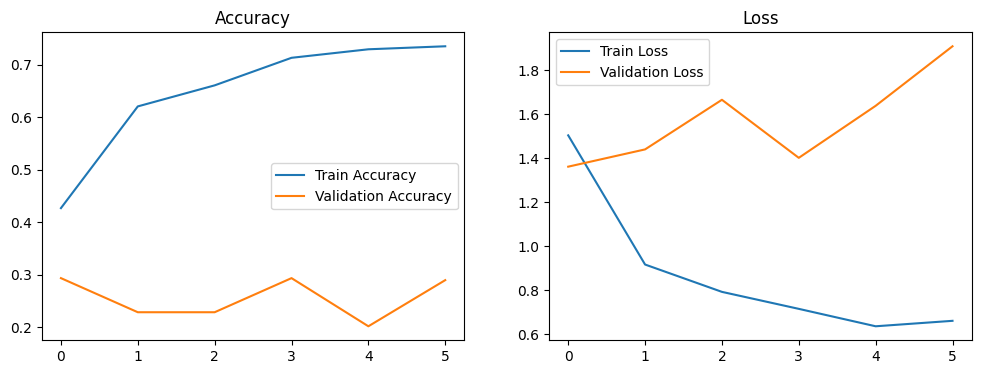

9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step

Classification Report:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00        60
  meningioma       0.00      0.00      0.00        61
     notumor       0.29      0.12      0.17        81
   pituitary       0.23      0.88      0.37        60

    accuracy                           0.24       262
   macro avg       0.13      0.25      0.14       262
weighted avg       0.14      0.24      0.14       262



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


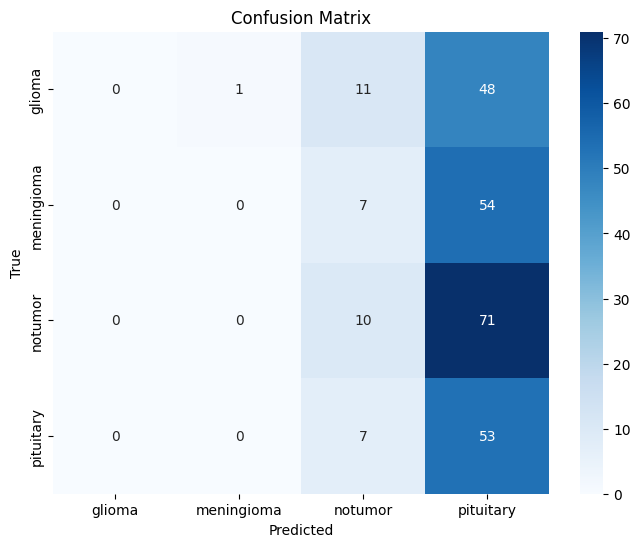

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Set up paths and parameters
dataset_path = '/content/drive/MyDrive/dataset'  # Path to your dataset
img_size = (227, 227)  # AlexNet uses 227x227 images
batch_size = 32
num_classes = 4
epochs = 20

# Step 2: Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Step 3: Build AlexNet Model
model = Sequential([
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Conv2D(256, (5, 5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer for 4 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stopping]
)

# Step 5: Evaluate the Model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Step 6: Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Step 7: Classification Report and Confusion Matrix
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Function to Predict New MRI Images
def predict_image(img_path):
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_names = list(train_generator.class_indices.keys())
    return class_names[np.argmax(prediction)], np.max(prediction)


In [ ]:
# Example usage
img_path = '/content/Te-noTr_0006.jpg'
predicted_class, confidence = predict_image(img_path)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted Class: pituitary, Confidence: 0.30


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions for the validation set
val_generator.reset()  # Reset generator to avoid any batch issues
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


NameError: name 'val_generator' is not defined